In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
employment_by_gender_birth = pd.read_csv("../data/employment_birth_sex.csv")
employment_by_gender_birth.head()

,COUNTRY,Country,BIRTH,Place of birth,GENDER,Gender,RATE,Rate,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2000,2000,PC,Percentage,0,Units,NaN,NaN,74.0,NaN,NaN
1,AUS,Australia,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2001,2001,PC,Percentage,0,Units,NaN,NaN,73.9,NaN,NaN
2,AUS,Australia,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2002,2002,PC,Percentage,0,Units,NaN,NaN,74.0,NaN,NaN
3,AUS,Australia,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2003,2003,PC,Percentage,0,Units,NaN,NaN,74.1,NaN,NaN
4,AUS,Australia,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2004,2004,PC,Percentage,0,Units,NaN,NaN,75.6,NaN,NaN


In [76]:
employment_by_gender_birth['Rate'].unique()

array(['Employment rate', 'Unemployment rate', 'Participation rate'],
      dtype=object)

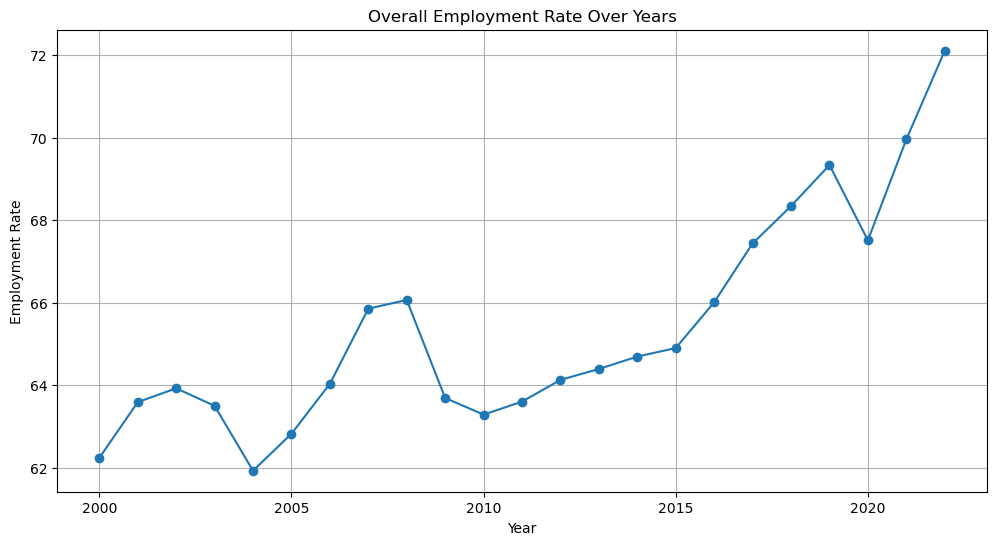

In [81]:
overall_employment_rate = employment_by_gender_birth[(employment_by_gender_birth['Gender'] == 'Total') & (employment_by_gender_birth['RATE'] == "N_RATE") & (employment_by_gender_birth['BIRTH'] == 'FB')]
overall_employment_rate = overall_employment_rate.groupby('Year')['Value'].mean()

plt.figure(figsize=(12, 6))
plt.plot(overall_employment_rate.index, overall_employment_rate.values, marker='o')
plt.title('Overall Employment Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Employment Rate')
plt.grid(True)
plt.show()


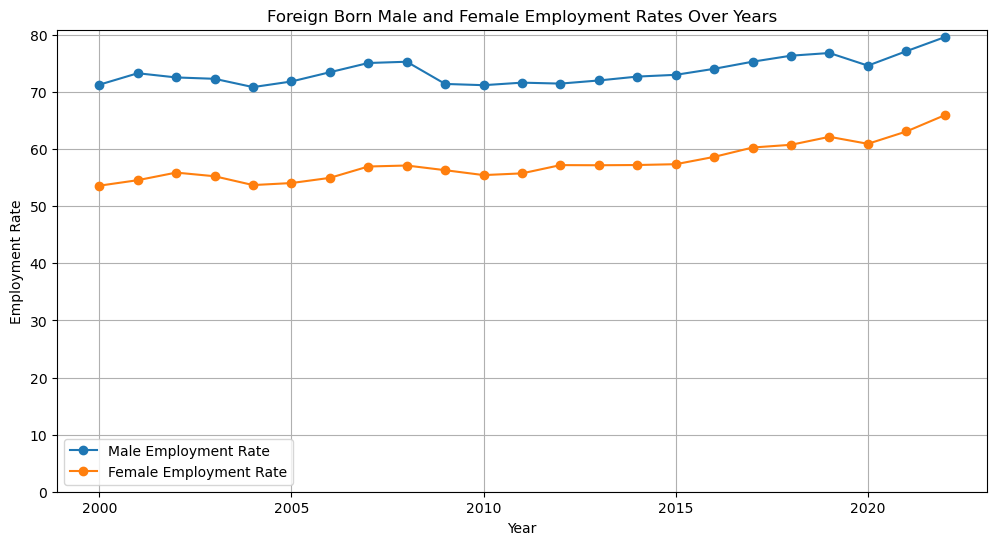

In [89]:
plt.figure(figsize=(12, 6))

male_employment_rate = employment_by_gender_birth[(employment_by_gender_birth['RATE'] == "N_RATE") & (employment_by_gender_birth['Gender'] == 'Men') & (employment_by_gender_birth['BIRTH'] == 'FB')]
male_employment_rate = male_employment_rate.groupby('Year')['Value'].mean()
plt.plot(male_employment_rate.index, male_employment_rate.values, marker='o', label='Male Employment Rate')

female_employment_rate = employment_by_gender_birth[(employment_by_gender_birth['RATE'] == "N_RATE") & (employment_by_gender_birth['Gender'] == 'Women') & (employment_by_gender_birth['BIRTH'] == 'FB')]
female_employment_rate = female_employment_rate.groupby('Year')['Value'].mean()
plt.plot(female_employment_rate.index, female_employment_rate.values, marker='o', label='Female Employment Rate')

plt.ylim(0)  # Start the y-axis from 0
plt.title('Foreign Born Male and Female Employment Rates Over Years')
plt.xlabel('Year')
plt.ylabel('Employment Rate')
plt.grid(True)
plt.legend()
plt.show()


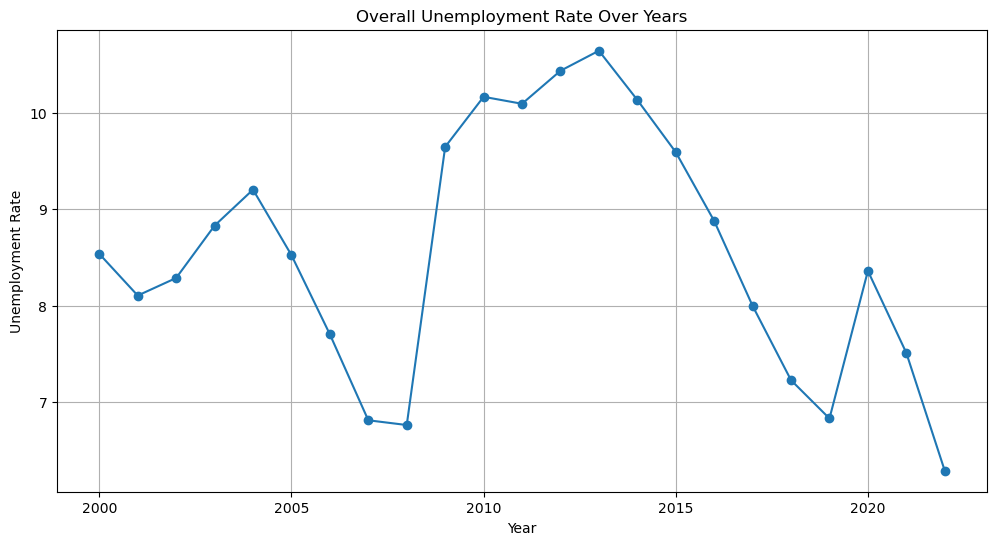

In [78]:
overall_unemployment_rate = employment_by_gender_birth[(employment_by_gender_birth['Gender'] == 'Total') & (employment_by_gender_birth['Rate'] == "Unemployment rate")]
overall_unemployment_rate = overall_unemployment_rate.groupby('Year')['Value'].mean()

plt.figure(figsize=(12, 6))
plt.plot(overall_unemployment_rate.index, overall_unemployment_rate.values, marker='o')
plt.title('Overall Unemployment Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.show()



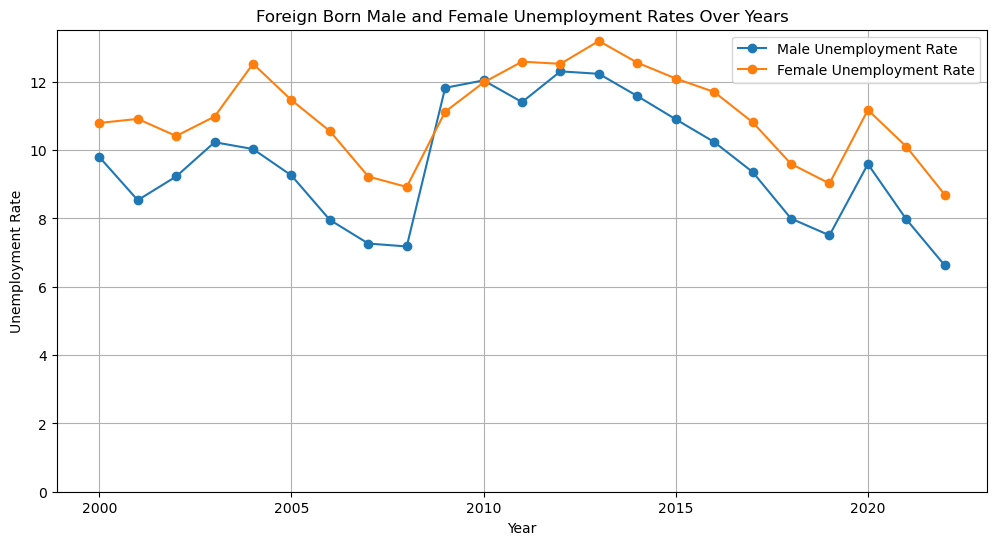

In [88]:
plt.figure(figsize=(12, 6))

male_unemployment_rate = employment_by_gender_birth[(employment_by_gender_birth['Rate'] == "Unemployment rate") & (employment_by_gender_birth['Gender'] == 'Men') & (employment_by_gender_birth['BIRTH'] == 'FB')]
male_unemployment_rate = male_unemployment_rate.groupby('Year')['Value'].mean()
plt.plot(male_unemployment_rate.index, male_unemployment_rate.values, marker='o', label='Male Unemployment Rate')

female_unemployment_rate = employment_by_gender_birth[(employment_by_gender_birth['Rate'] == "Unemployment rate") & (employment_by_gender_birth['Gender'] == 'Women') & (employment_by_gender_birth['BIRTH'] == 'FB')]
female_unemployment_rate = female_unemployment_rate.groupby('Year')['Value'].mean()
plt.plot(female_unemployment_rate.index, female_unemployment_rate.values, marker='o', label='Female Unemployment Rate')

plt.ylim(0)  # Start the y-axis from 0
plt.title('Foreign Born Male and Female Unemployment Rates Over Years')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.legend()
plt.show()


# employment rate among foreign born population in top migrating countries in 2022

In [3]:
employment_by_gender_birth = employment_by_gender_birth[employment_by_gender_birth['RATE'] == "N_RATE"]


In [9]:
employment_by_gender_birth = employment_by_gender_birth.sort_values(by='Value', ascending=False)
top_5_countries = ['United States', 'Italy', 'Kora', 'Germany']
top_5 = employment_by_gender_birth[employment_by_gender_birth['Country'].isin(top_5_countries)]
top_5_22 = top_5[(top_5['Year'] == 2022) & (top_5["Gender"] != 'Total')]
# top_5 = top_5.head()

In [10]:
top_5_22

,COUNTRY,Country,BIRTH,Place of birth,GENDER,Gender,RATE,Rate,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
5333,USA,United States,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,83.2,NaN,NaN
7818,DEU,Germany,NB,Native-born,MEN,Men,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,81.3,NaN,NaN
1606,DEU,Germany,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,78.1,NaN,NaN
2636,ITA,Italy,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,77.4,NaN,NaN
7887,DEU,Germany,NB,Native-born,WMN,Women,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,76.6,NaN,NaN
11548,USA,United States,NB,Native-born,MEN,Men,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,72.9,NaN,NaN
8853,ITA,Italy,NB,Native-born,MEN,Men,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,68.0,NaN,NaN
11617,USA,United States,NB,Native-born,WMN,Women,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,66.0,NaN,NaN
5402,USA,United States,FB,Foreign-born,WMN,Women,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,62.2,NaN,NaN
1675,DEU,Germany,FB,Foreign-born,WMN,Women,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,61.2,NaN,NaN


In [17]:
top_5_22['BIRTH'].unique()

array(['FB', 'NB'], dtype=object)

<Figure size 1500x1000 with 0 Axes>

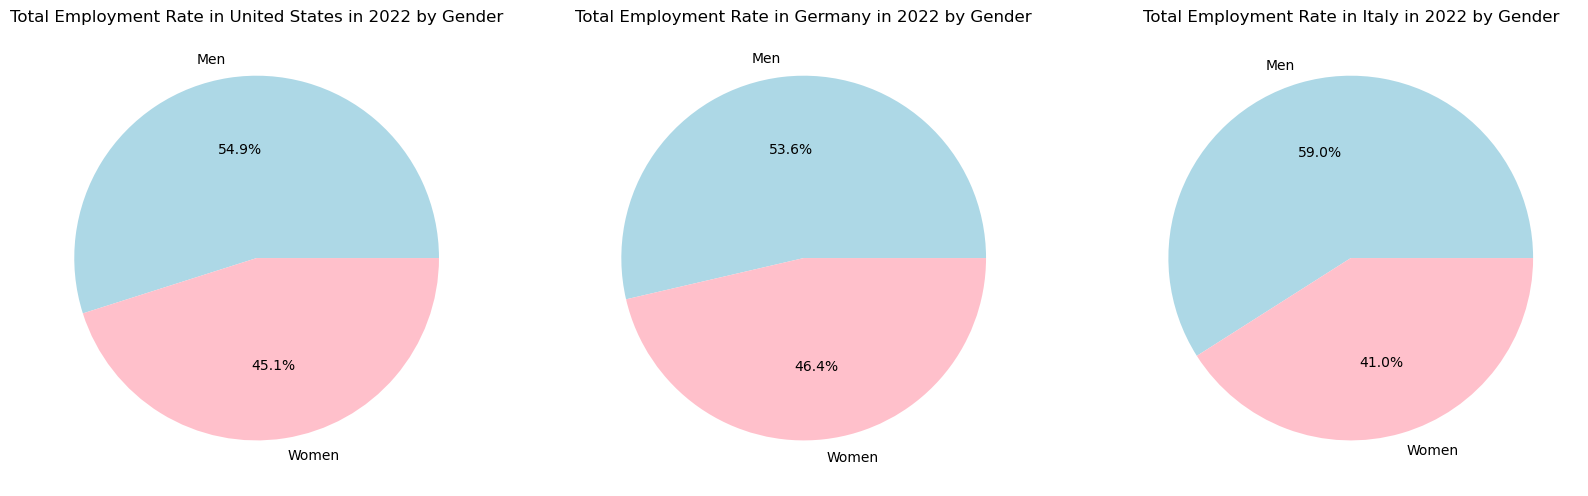

In [20]:
# employment rate among foreign born population in top imigrating countries in 2022
plt.figure(figsize=(15, 10))

countries = top_5_22['Country'].unique()

fig, axs = plt.subplots(1, len(countries), figsize=(20, 6))

for i, country in enumerate(countries):
    country_data = top_5_22[top_5_22['Country'] == country]
    employment_rate = country_data[country_data['Rate'] == 'Employment rate']
    employment_rate = employment_rate.groupby('Gender')['Value'].sum()
    
    axs[i].pie(employment_rate.values, labels=employment_rate.index, autopct='%1.1f%%', colors=['lightblue', 'pink'])
    axs[i].set_title(f'Total Employment Rate in {country} in 2022 by Gender')

plt.show()


